<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [222]:
states = pd.read_csv("../data/states_edu.csv")
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [272]:
states.replace(r'^\s+$', np.nan, regex=True)
states = states.dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [273]:
states.groupby('YEAR').size()
states['YEAR'].max() - states['YEAR'].min()

12

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [274]:
states[states.STATE.isin(['MICHIGAN','OHIO'])].groupby('STATE')['AVG_MATH_4_SCORE'].mean()

STATE
MICHIGAN    236.714286
OHIO        243.285714
Name: AVG_MATH_4_SCORE, dtype: float64

Find the average for your pedictor score across all states in 2019

In [275]:
states[states.STATE.isin(states['STATE'].head(51))].groupby('STATE')['AVG_MATH_4_SCORE'].mean()

STATE
ALABAMA                 228.571429
ALASKA                  235.857143
ARIZONA                 233.428571
ARKANSAS                236.285714
CALIFORNIA              231.166667
COLORADO                241.428571
CONNECTICUT             242.285714
DELAWARE                239.857143
DISTRICT_OF_COLUMBIA    218.714286
FLORIDA                 240.285714
GEORGIA                 235.571429
HAWAII                  235.285714
IDAHO                   239.857143
ILLINOIS                236.571429
INDIANA                 243.857143
IOWA                    242.285714
KANSAS                  244.857143
KENTUCKY                236.857143
LOUISIANA               230.142857
MAINE                   242.428571
MARYLAND                240.857143
MASSACHUSETTS           250.000000
MICHIGAN                236.714286
MINNESOTA               248.000000
MISSISSIPPI             228.571429
MISSOURI                238.428571
MONTANA                 242.000000
NEBRASKA                239.714286
NEVADA        

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [276]:
states[states.STATE.isin(states['STATE'].head(51))].groupby('STATE')['AVG_MATH_4_SCORE'].mean().max()

250.0

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [278]:
states['CHANGE_IN_STUDENT_POPULATION'] = states['GRADES_12_G'] - states['GRADES_4_G']
states['BUDGET'] = (states['INSTRUCTION_EXPENDITURE'])/(states['TOTAL_EXPENDITURE'])
states[states.STATE.isin(states['STATE'].head(51))].groupby('STATE')['CHANGE_IN_STUDENT_POPULATION','BUDGET','AVG_MATH_4_SCORE'].mean()




/var/folders/hk/2dnkjyt16gl5c424vh7rfc8m0000gn/T/ipykernel_20952/2156461071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states['CHANGE_IN_STUDENT_POPULATION'] = states['GRADES_12_G'] - states['GRADES_4_G']
/var/folders/hk/2dnkjyt16gl5c424vh7rfc8m0000gn/T/ipykernel_20952/2156461071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states['BUDGET'] = (states['INSTRUCTION_EXPENDITURE'])/(states['TOTAL_EXPENDITURE'])
/var/folders/hk/2dnkjyt16gl5c424vh7rfc8m0000gn/T/ipykernel_20952/2156461071.py:3: Fut

,CHANGE_IN_STUDENT_POPULATION,BUDGET,AVG_MATH_4_SCORE
STATE,,,
ALABAMA,-9943.285714,0.510767,228.571429
ALASKA,-202.000000,0.484533,235.857143
ARIZONA,-3256.000000,0.469908,233.428571
ARKANSAS,-5164.000000,0.496345,236.285714
CALIFORNIA,-13207.500000,0.482433,231.166667
COLORADO,-4384.142857,0.476984,241.428571
CONNECTICUT,-1396.142857,0.556104,242.285714
DELAWARE,-1472.857143,0.515695,239.857143
DISTRICT_OF_COLUMBIA,-1708.428571,0.419320,218.714286


Final feature list: **<LIST FEATURES HERE\>**

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**
I chose to look at how the student body change from 12th graders to 4th graders had a visible change in test scores. If the state improves or worsens their education system, as noted by test grades, then there may be a greater change in student population, although this may be a too large of a figure to account for. Another variable is how the state budgets their instruction expenditure compared to total expenditure and if that has an effect on exam averages. This is to see if the students benefit from having most of the school's resources budgeted towards education.



<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='CHANGE_IN_STUDENT_POPULATION', ylabel='AVG_MATH_4_SCORE'>

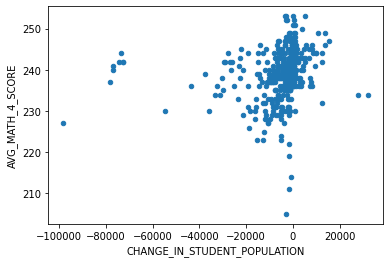

In [279]:
states.plot.scatter(x='CHANGE_IN_STUDENT_POPULATION', y='AVG_MATH_4_SCORE')

**<CAPTION FOR VIZ 1>**
Scatter plot of changes in student population and relation to math scores

**Visualization 2**

<AxesSubplot:xlabel='BUDGET', ylabel='AVG_MATH_4_SCORE'>

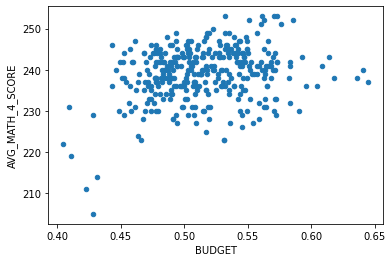

In [280]:
states.plot.scatter(x='BUDGET', y='AVG_MATH_4_SCORE')

**<CAPTION FOR VIZ 2>**
Changes in student population over time, by state

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
X = states[['CHANGE_IN_STUDENT_POPULATION','BUDGET','YEAR']].dropna()
states['AVG_MATH_4_SCORE'] = states['AVG_MATH_4_SCORE'].dropna()
y = states.loc[X.index]['AVG_MATH_4_SCORE']

In [283]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [284]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [285]:
# create your model here
model = LinearRegression()


In [286]:
model.fit(X_train, y_train)

LinearRegression()

In [287]:
y_pred = model.predict(X_test)

In [289]:
# FOR CLASSIFICATION ONLY:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
                         #cmap=plt.cm.Blues)

Text(0, 0.5, 'Math 4 test score')

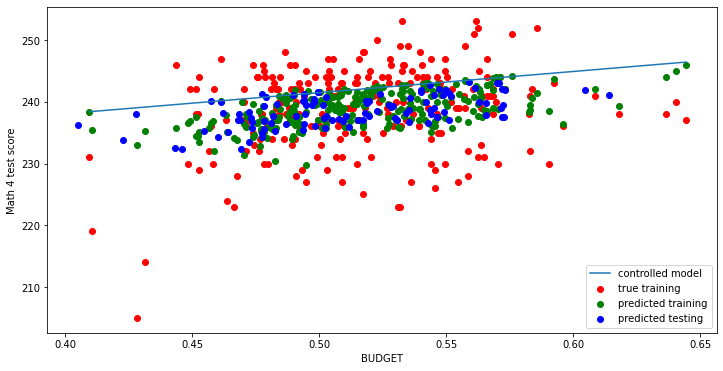

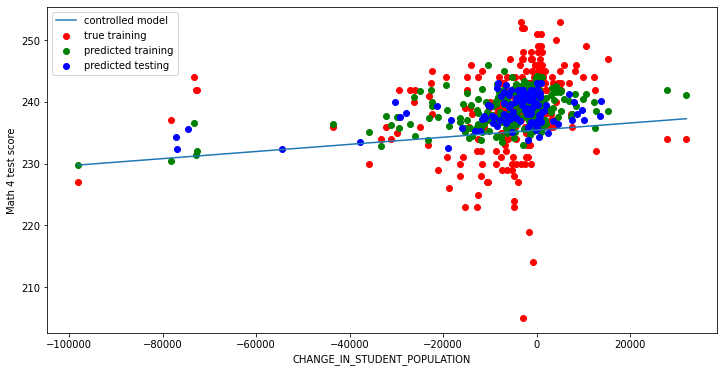

In [293]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'BUDGET'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 test score')

col_name = 'CHANGE_IN_STUDENT_POPULATION'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 test score')

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**

In [ ]:
In the two plots, math 4 test scores were analyzed in relation to the instruction expenditure based on total expenditure and changes in the student population within a given state. For the first set, most values followed a similar trend that showed a slight positive correlation between the two variables. For the second plot, the change in student population were mostly minimal, and there were many outliers that strayed from the expected. However, the change in student population did not seem to have an impact on the test scores.